# Linear Regression: Calorie Intake Prediction
#
## 1. Imports and Data Loading

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from numpy import convolve

sns.color_palette("tab10",8)
daily_activity_merged = pd.read_csv("data/dailyActivity_merged.csv")
daily_activity_merged.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


## 2. Data cleaning and Variable Selection

<Axes: title={'center': 'Correlation matrix after variable selection'}>

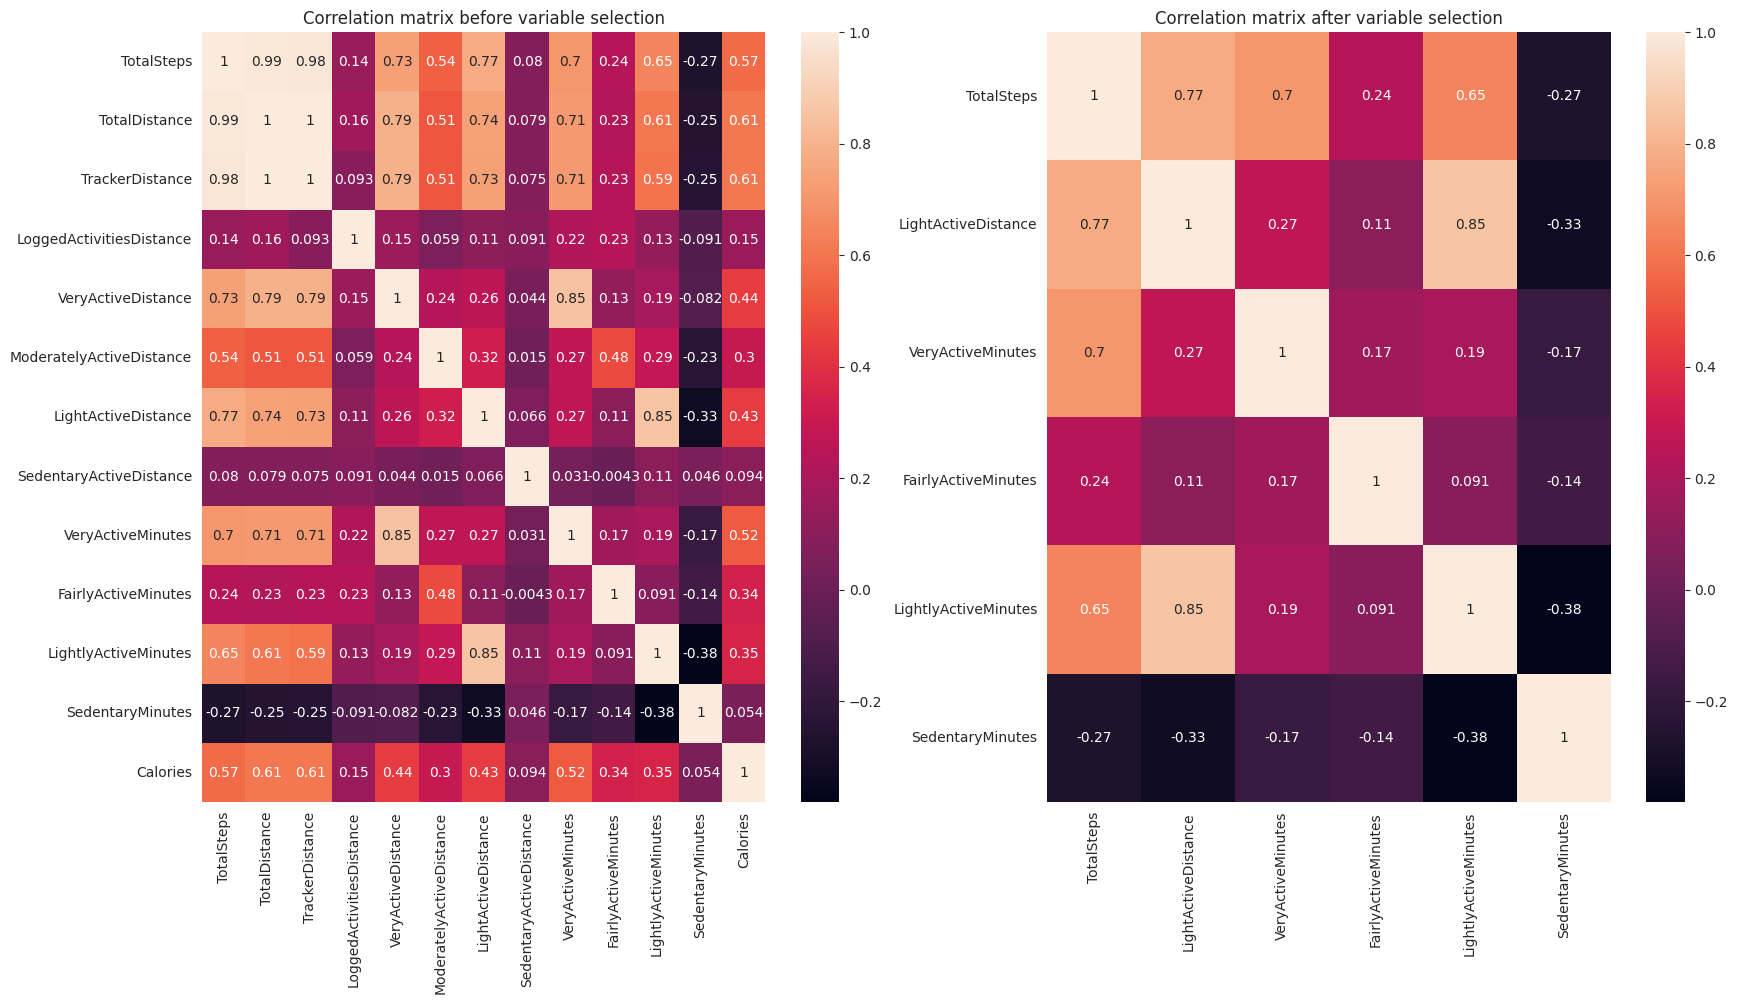

In [23]:
daily_activity_merged = daily_activity_merged.loc[daily_activity_merged["Calories"] > 0,:] # Avoid all zero values. Scaling issues you know
daily_activity_merged.drop(["Id","ActivityDate"],axis=1,inplace=True) # Not necessary for this analysis. Drop em

response_variable = daily_activity_merged.loc[:,["Calories"]] # This will be our target variable. Since we are making predictions about calories
predictor_variables = daily_activity_merged.loc[:,["TotalSteps","LightActiveDistance","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes"]] # Selecting uncorrelated variables

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axs[0].set_title("Correlation matrix before variable selection")
axs[1].set_title("Correlation matrix after variable selection")
sns.heatmap(daily_activity_merged.iloc[:,:].corr(), ax = axs[0],annot=True)
sns.heatmap(predictor_variables.corr(),ax=axs[1],annot=True)

##
## 3. Model Training

In [24]:

kf = KFold(shuffle=True,random_state=42,n_splits=3) # 3 cross validation splits

# Estimator pipeline definition
estimator = Pipeline([("scaler",StandardScaler()),("polynomial_features",PolynomialFeatures()),("ridge_regression",Ridge())])
params = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(0.01, 10),  # Regularization strength
    'ridge_regression__max_iter': [5000, 10000]  # Maximum iterations
}
grid = GridSearchCV(estimator,params,cv=kf)
grid.fit(predictor_variables,response_variable)
print(f"Cross-validation Score {grid.best_score_}")

Cross-validation Score 0.579452335021107


## 4. Performance Visualization

In [25]:
best_estimator = grid.best_estimator_
y_predict = best_estimator.predict(predictor_variables)

score = r2_score(response_variable,y_predict)
print(f"R^2Score == {score}")

R^2Score == 0.6967914514216458


## 5.Conclusion

There is a significant non-linearity between predictors and the response variable.

This can also be seen in the inconsistencies between the Cross-validation score and R2_score

This is shown by the low r_score. This is also shown by the graph above. 
RScore = 0.7
